# Análisis de datos de Enfermedades Oncologicas 2023 - 2025 (SIS)
- link del dataset: https://www.datosabiertos.gob.pe/dataset/enfermedades-oncologicas-2023-2025
- Publicado: Fondo Intangible Solidario de Salud



Este proyecto tiene como objetivo realizar un análisis exploratorio (EDA) y descriptivo sobre el dataset, con el fin de:
- Entender la estructura de los datos
- Identificar tendencias y hacer análisis EDA
- Preparar la información para su posterior visualización en Power BI

### Importamos las librerias y hacemos un análisis incial

In [ ]:
#Importamos librerias necesarias
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [ ]:
#Cargamos el archivo de datos
df = pd.read_csv('reporte_datos_abiertos.txt', sep='|', encoding='utf-8')
df.head(5)

,DOCUMENTO_ANONIMIZADO,PERIODO,RENAES,IPRESS,REGION,DEPARTAMENTO,PROVINCIA,DISTRITO,UBIGEO,CODIGO_DIAGNOSTICO,...,SEXO,EDAD,TIPO_SEGURO,CODIGO_SERVICIO,SERVICIO,FECHA_ATENCION,FECHA_INTERNAMIENTO,FECHA_ALTA,MONTO_BRUTO,FECHA_CORTE
0,97200,202409,7633,HOSPITAL NACIONAL CAYETANO HEREDIA,LIMA,LIMA,LIMA,SAN MARTIN DE PORRES,150135,C504,...,Femenino,50.0,SIS PARA TODOS,901,Apoyo al Tratamiento,2024-09-25 07:30:00.0000000,NaN,NaN,180.24,2025-12-03
1,97200,202411,7633,HOSPITAL NACIONAL CAYETANO HEREDIA,LIMA,LIMA,LIMA,SAN MARTIN DE PORRES,150135,C503,...,Femenino,50.0,SIS PARA TODOS,56,Consulta externa,2024-10-23 07:52:00.0000000,NaN,NaN,23.57,2025-12-03
2,97200,202411,7633,HOSPITAL NACIONAL CAYETANO HEREDIA,LIMA,LIMA,LIMA,SAN MARTIN DE PORRES,150135,C509,...,Femenino,50.0,SIS PARA TODOS,71,Apoyo al diagnóstico,2024-10-26 09:45:00.0000000,NaN,NaN,17.04,2025-12-03
3,97200,202411,7633,HOSPITAL NACIONAL CAYETANO HEREDIA,LIMA,LIMA,LIMA,SAN MARTIN DE PORRES,150135,C509,...,Femenino,50.0,SIS PARA TODOS,71,Apoyo al diagnóstico,2024-11-18 10:02:00.0000000,NaN,NaN,42.19,2025-12-03
4,77326,202402,6210,INSTITUTO NACIONAL DE ENFERMEDADES NEOPLASICAS,LIMA,LIMA,LIMA,SURQUILLO,150141,C509,...,Femenino,50.0,SIS GRATUITO,56,Consulta externa,2024-01-22 07:36:00.0000000,NaN,NaN,10.69,2025-12-03


In [ ]:
#Verificamos los tipos de datos de cada columna
df.dtypes

DOCUMENTO_ANONIMIZADO      int64
PERIODO                    int64
RENAES                     int64
IPRESS                    object
REGION                    object
DEPARTAMENTO              object
PROVINCIA                 object
DISTRITO                  object
UBIGEO                     int64
CODIGO_DIAGNOSTICO        object
DIAGNOSTICOS              object
GRUPO_DIAGNOSTICOS        object
GRUPO_COBERTURA           object
SEXO                      object
EDAD                     float64
TIPO_SEGURO               object
CODIGO_SERVICIO            int64
SERVICIO                  object
FECHA_ATENCION            object
FECHA_INTERNAMIENTO       object
FECHA_ALTA                object
MONTO_BRUTO              float64
FECHA_CORTE               object
dtype: object

In [4]:
#Creamos un backup con la información original
df_backup = df.copy()

In [5]:
#Eliminare las siguientes columnas, debido a que no revelan información relevante para el análisis
df= df.drop(['DOCUMENTO_ANONIMIZADO','PERIODO','IPRESS','UBIGEO','CODIGO_DIAGNOSTICO','GRUPO_COBERTURA','CODIGO_SERVICIO','FECHA_CORTE'], axis=1)
df.head(5)

,RENAES,REGION,DEPARTAMENTO,PROVINCIA,DISTRITO,DIAGNOSTICOS,GRUPO_DIAGNOSTICOS,SEXO,EDAD,TIPO_SEGURO,SERVICIO,FECHA_ATENCION,FECHA_INTERNAMIENTO,FECHA_ALTA,MONTO_BRUTO
0,7633,LIMA,LIMA,LIMA,SAN MARTIN DE PORRES,TUMOR MALIGNO DEL CUADRANTE SUPERIOR EXTERNO D...,CANCER DE MAMA,Femenino,50.0,SIS PARA TODOS,Apoyo al Tratamiento,2024-09-25 07:30:00.0000000,NaN,NaN,180.24
1,7633,LIMA,LIMA,LIMA,SAN MARTIN DE PORRES,TUMOR MALIGNO DEL CUADRANTE INFERIOR INTERNO D...,CANCER DE MAMA,Femenino,50.0,SIS PARA TODOS,Consulta externa,2024-10-23 07:52:00.0000000,NaN,NaN,23.57
2,7633,LIMA,LIMA,LIMA,SAN MARTIN DE PORRES,"TUMOR MALIGNO DE LA MAMA, PARTE NO ESPECIFICADA",CANCER DE MAMA,Femenino,50.0,SIS PARA TODOS,Apoyo al diagnóstico,2024-10-26 09:45:00.0000000,NaN,NaN,17.04
3,7633,LIMA,LIMA,LIMA,SAN MARTIN DE PORRES,"TUMOR MALIGNO DE LA MAMA, PARTE NO ESPECIFICADA",CANCER DE MAMA,Femenino,50.0,SIS PARA TODOS,Apoyo al diagnóstico,2024-11-18 10:02:00.0000000,NaN,NaN,42.19
4,6210,LIMA,LIMA,LIMA,SURQUILLO,"TUMOR MALIGNO DE LA MAMA, PARTE NO ESPECIFICADA",CANCER DE MAMA,Femenino,50.0,SIS GRATUITO,Consulta externa,2024-01-22 07:36:00.0000000,NaN,NaN,10.69


In [ ]:
#Verificamos si hay datos nulos en el dataframe
df.isnull().sum()

RENAES                                 0
REGION                                 0
DEPARTAMENTO                           0
PROVINCIA                              0
DISTRITO                               0
DIAGNOSTICOS                           0
GRUPO_DIAGNOSTICOS                     0
SEXO                                   6
EDAD                                  19
TIPO_SEGURO                            0
SERVICIO                               0
FECHA_ATENCION                         0
FECHA_INTERNAMIENTO              1024725
FECHA_ALTA                       1019685
MONTO_BRUTO                            0
DIFERENCIA_ALTA_INTERNAMIENTO    1024725
DIFERENCIA_DIAS                  1024725
dtype: int64

### Analisis Univariado

C:\Users\Eduardo\AppData\Local\Temp\ipykernel_12156\1879808176.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo_departamentos.index, y=conteo_departamentos.values, palette='viridis')


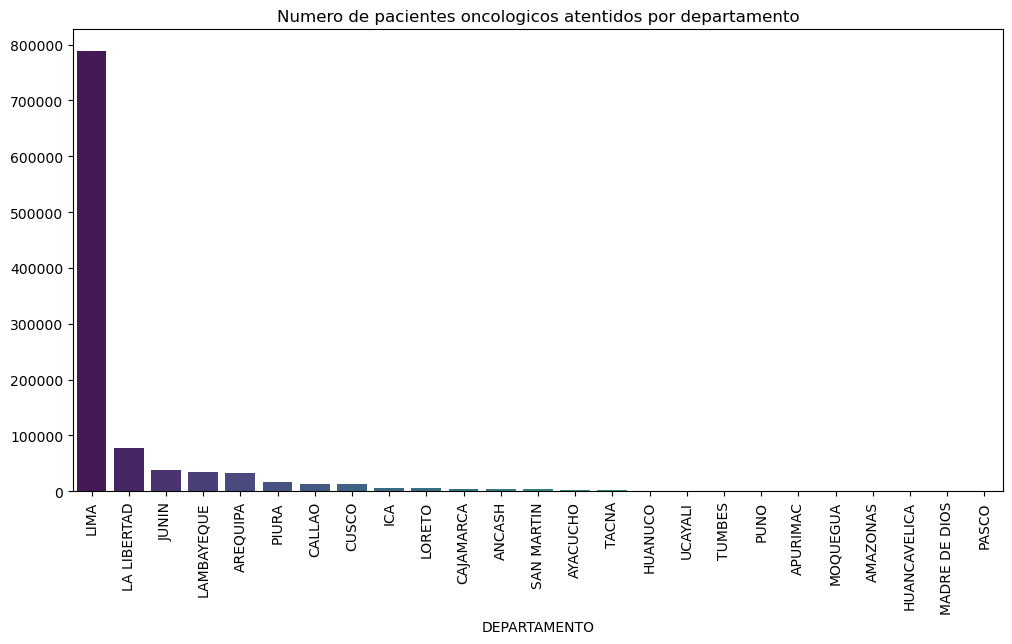

In [7]:
# Determinar en que departamento se ubican la gran cantidad de atentidos por establecimiento de salud
conteo_departamentos = df['DEPARTAMENTO'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=conteo_departamentos.index, y=conteo_departamentos.values, palette='viridis')
plt.title("Numero de pacientes oncologicos atentidos por departamento")
plt.xticks(rotation=90)
plt.show()

C:\Users\Eduardo\AppData\Local\Temp\ipykernel_12156\3937222084.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10.values, y=top_10.index, palette='magma')
C:\Users\Eduardo\AppData\Local\Temp\ipykernel_12156\3937222084.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo_grupo_diagnosticos.values, y=conteo_grupo_diagnosticos.index, palette='magma')


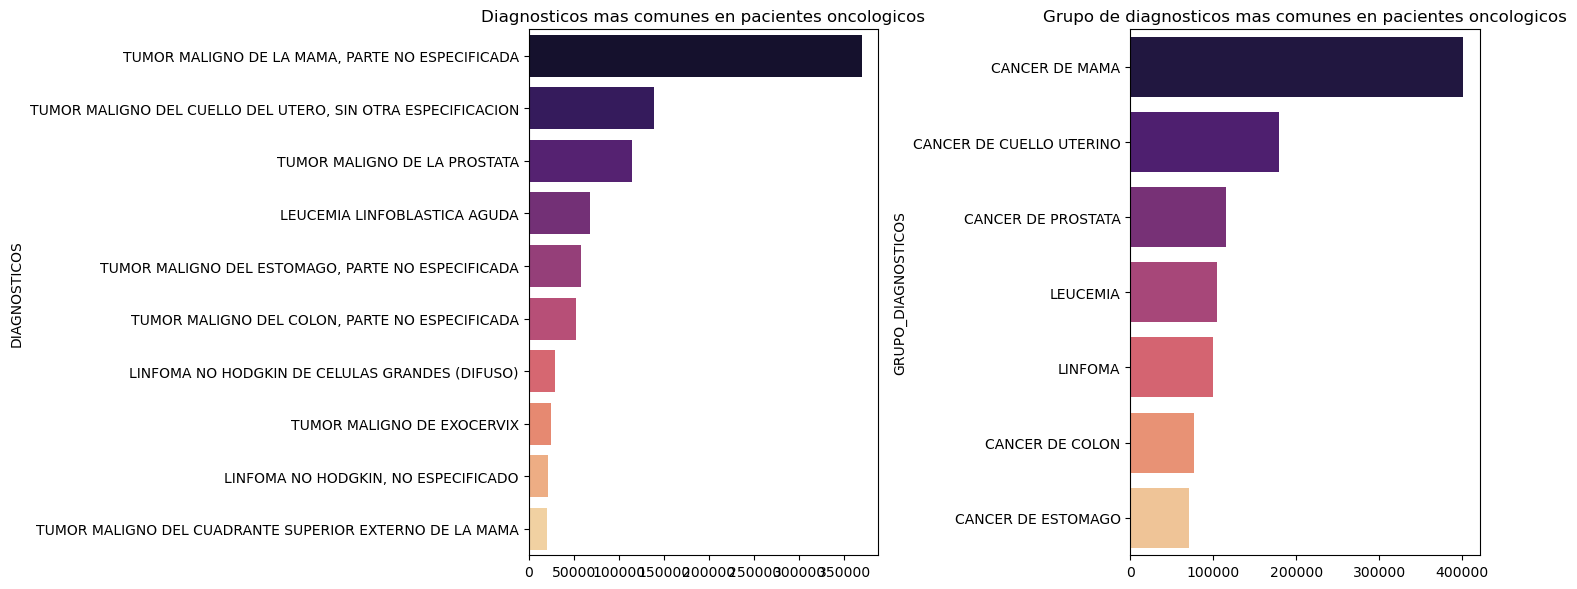

In [8]:
#Determinar el diagnostio y grupo de diagnósticos más comunes 

conteo_diagnosticos = df['DIAGNOSTICOS'].value_counts()
conteo_grupo_diagnosticos = df['GRUPO_DIAGNOSTICOS'].value_counts()
top_10 = conteo_diagnosticos.head(10)

fig, (ax,ax1)=plt.subplots(1,2, figsize=(15,6))
plt.subplot(1,2,1)
sns.barplot(x=top_10.values, y=top_10.index, palette='magma')
plt.title("Diagnosticos mas comunes en pacientes oncologicos")

plt.subplot(1,2,2)
sns.barplot(x=conteo_grupo_diagnosticos.values, y=conteo_grupo_diagnosticos.index, palette='magma')
plt.title("Grupo de diagnosticos mas comunes en pacientes oncologicos")
plt.tight_layout()
plt.show()

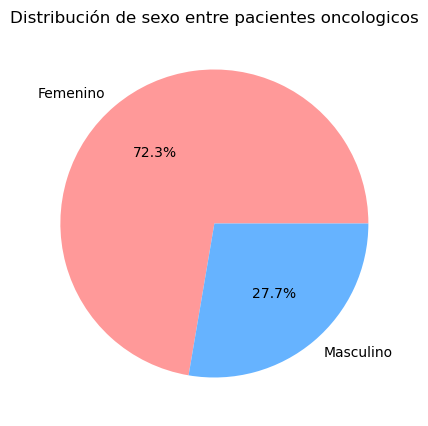

In [9]:
# Determinar el sexo más común entre los pacientes oncologicos
conteo_sexo = df['SEXO'].value_counts()
plt.figure(figsize=(8, 5))
plt.pie(conteo_sexo.values, labels=conteo_sexo.index, autopct='%1.1f%%', colors=['#ff9999','#66b3ff'])
plt.title("Distribución de sexo entre pacientes oncologicos")
plt.show()

La edad promedio de los pacientes oncologicos es: 55.89 años
La edad promedio de las mujeres oncologicas es: 54.86 años
La edad promedio de los hombres oncologicos es: 58.58 años
La edad mínima de los pacientes oncologicos es: 0.0 años
La edad máxima de los pacientes oncologicos es: 104.0 años


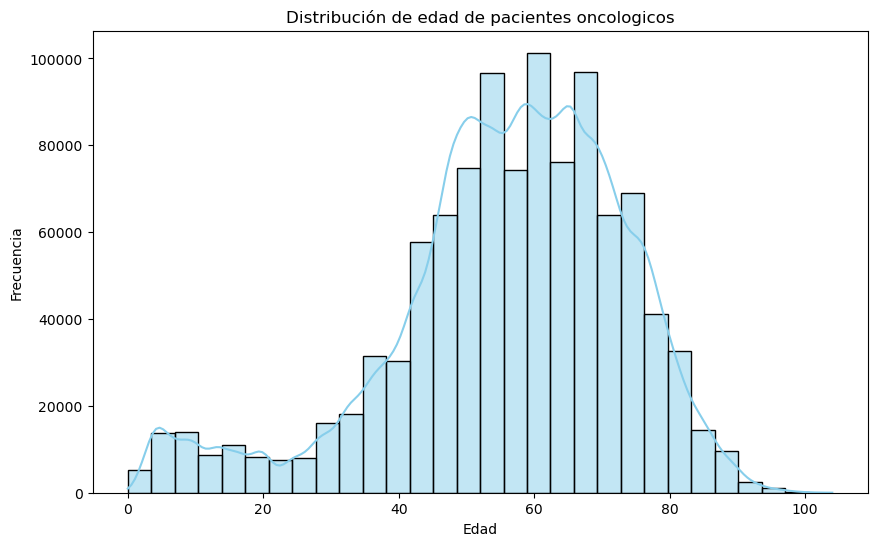

In [10]:
#la edad promedio y distribución de edad de los pacientes
edad_primedio = df['EDAD'].mean()
edad_promedio_mujeres= df[df['SEXO']=='Femenino']['EDAD'].mean()
edad_promedio_hombres= df[df['SEXO']=='Masculino']['EDAD'].mean()
edad_minima = df['EDAD'].min()
edad_maxima = df['EDAD'].max()

print(f"La edad promedio de los pacientes oncologicos es: {edad_primedio:.2f} años")
print(f"La edad promedio de las mujeres oncologicas es: {edad_promedio_mujeres:.2f} años")
print(f"La edad promedio de los hombres oncologicos es: {edad_promedio_hombres:.2f} años")
print(f"La edad mínima de los pacientes oncologicos es: {edad_minima} años")
print(f"La edad máxima de los pacientes oncologicos es: {edad_maxima} años")

plt.figure(figsize=(10, 6))
sns.histplot(df['EDAD'], bins=30, kde=True, color='skyblue')
plt.title("Distribución de edad de pacientes oncologicos")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()

In [ ]:
#Analizar los diagnósticos asociados a pacientes con edad 0
df_cero = df[df['EDAD'] == 0]
df_cero['DIAGNOSTICOS'].unique()

array(['LEUCEMIA, NO ESPECIFICADA', 'LEUCEMIA LINFOBLASTICA AGUDA',
       'LEUCEMIA AGUDA, CELULAS DE TIPO NO ESPECIFICADO',
       'LINFOMA NO HODGKIN, NO ESPECIFICADO', 'LEUCEMIA MIELOIDE CRONICA',
       'LEUCEMIA MIELOIDE AGUDA',
       'TUMOR MALIGNO DE LA MAMA, PARTE NO ESPECIFICADA',
       'LEUCEMIA MIELOMONOCITICA AGUDA',
       'ENFERMEDAD DE HODGKIN CON DEPLECION LINFOCITICA',
       'OTROS TIPOS ESPECIFICADOS DE LINFOMA NO HODGKIN DIFUSO',
       'OTRAS LEUCEMIAS DE CELULAS DE TIPO NO ESPECIFICADO',
       'LEUCEMIA MIELOIDE, SIN OTRA ESPECIFICACION',
       'LEUCEMIA MONOCITICA, SIN OTRA ESPECIFICACION',
       'LEUCEMIA PROLINFOCITICA'], dtype=object)

C:\Users\Eduardo\AppData\Local\Temp\ipykernel_12156\55620775.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='TIPO_SEGURO', palette='Set2')


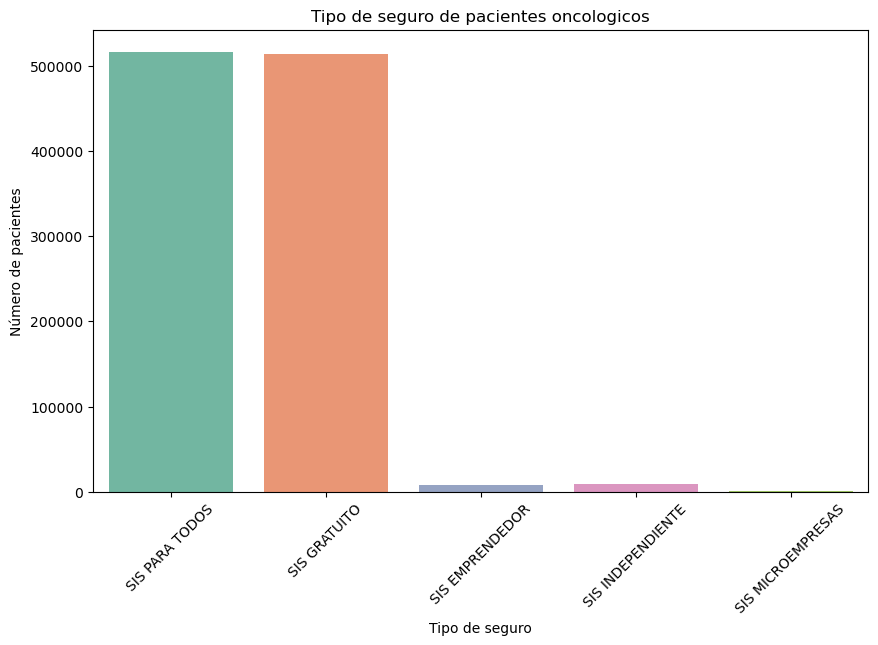

In [12]:
#los tipo de seguro por pacientes
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='TIPO_SEGURO', palette='Set2')
plt.title("Tipo de seguro de pacientes oncologicos")
plt.xlabel("Tipo de seguro")
plt.ylabel("Número de pacientes")
plt.xticks(rotation=45)
plt.show()

In [13]:
#Analisis del monto bruto
valor_maximo_monto = df['MONTO_BRUTO'].max()
valor_minimo_monto = df['MONTO_BRUTO'].min()
valor_promedio_monto = df['MONTO_BRUTO'].mean()
print(f"El monto bruto máximo por servicio prestado es: S/{valor_maximo_monto:.2f}")
print(f"El monto bruto mínimo por servicio prestado es: S/{valor_minimo_monto:.2f}")
print(f"El monto bruto promedio por servicio prestado es: S/{valor_promedio_monto:.2f}")


El monto bruto máximo por servicio prestado es: S/341994.28
El monto bruto mínimo por servicio prestado es: S/0.00
El monto bruto promedio por servicio prestado es: S/225.93


In [26]:
#Monto bruto máximo 
df_monto_alto = df[df['MONTO_BRUTO'] == df['MONTO_BRUTO'].max()]
df_monto_alto

,RENAES,REGION,DEPARTAMENTO,PROVINCIA,DISTRITO,DIAGNOSTICOS,GRUPO_DIAGNOSTICOS,SEXO,EDAD,TIPO_SEGURO,SERVICIO,FECHA_ATENCION,FECHA_INTERNAMIENTO,FECHA_ALTA,MONTO_BRUTO,DIFERENCIA_ALTA_INTERNAMIENTO,DIFERENCIA_DIAS
773123,6210,LIMA,LIMA,LIMA,SURQUILLO,LEUCEMIA LINFOBLASTICA AGUDA,LEUCEMIA,Masculino,19.0,SIS PARA TODOS,Internamiento con Estancia en la Unidad de Cui...,2024-06-14 16:46:00,2023-12-28,2024-06-14,341994.2794,169 days,169.0


### Analisis bivariado y multivariado

C:\Users\Eduardo\AppData\Local\Temp\ipykernel_12156\3827879487.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_monto_cero, x='SERVICIO', palette='Set3')


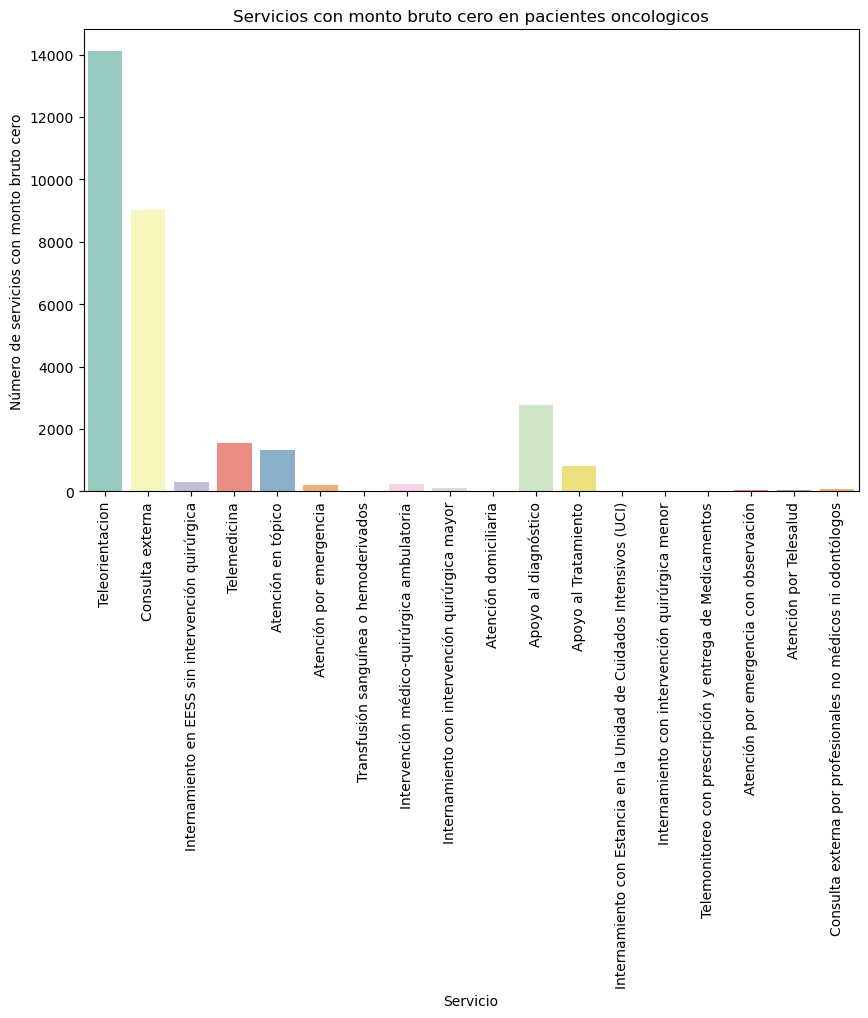

In [28]:
#Análisis de monto brutos cero
df_monto_cero = df[df['MONTO_BRUTO'] == 0]
df_monto_cero
#Graficos de servicios qeue tienen monto bruto cero
plt.figure(figsize=(10, 6))
sns.countplot(data=df_monto_cero, x='SERVICIO', palette='Set3')
plt.title("Servicios con monto bruto cero en pacientes oncologicos")
plt.xlabel("Servicio")
plt.ylabel("Número de servicios con monto bruto cero")
plt.xticks(rotation=90)
plt.show()

C:\Users\Eduardo\AppData\Local\Temp\ipykernel_12156\198399481.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='SERVICIO', y='MONTO_BRUTO', data=df, estimator=np.mean, ci=None, palette='coolwarm')
C:\Users\Eduardo\AppData\Local\Temp\ipykernel_12156\198399481.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='SERVICIO', y='MONTO_BRUTO', data=df, estimator=np.mean, ci=None, palette='coolwarm')


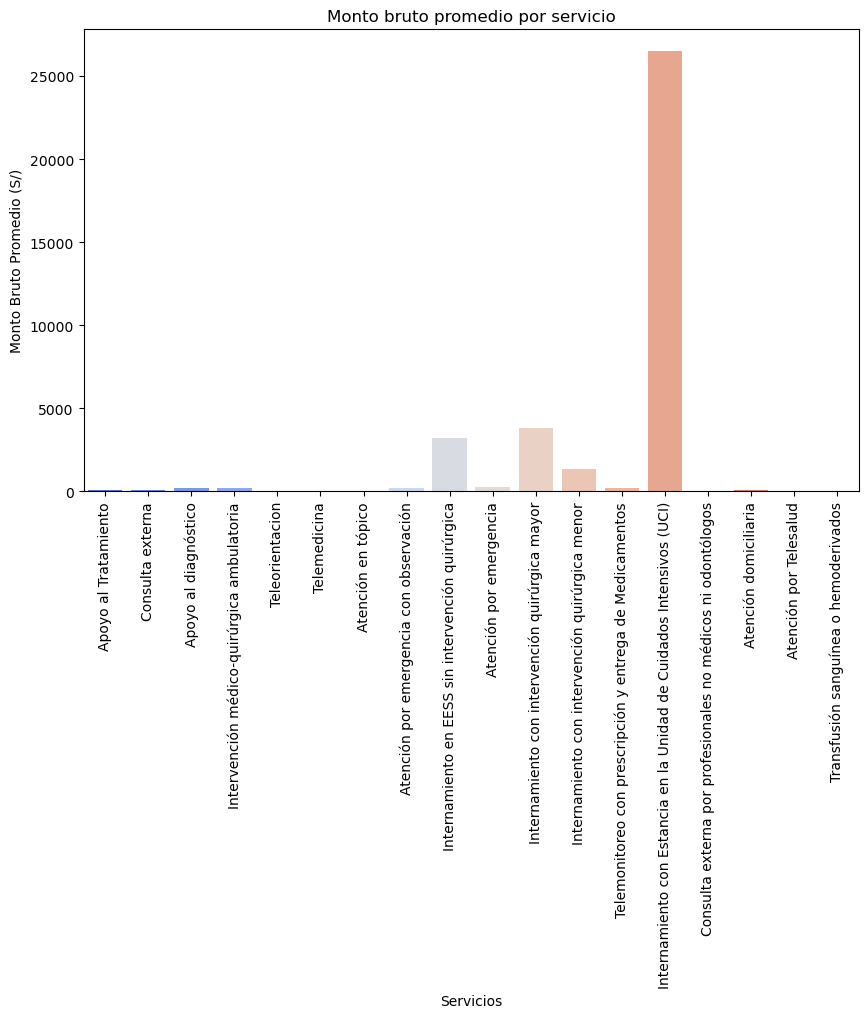

In [16]:
#Determinar el monto aproximado por servicio prestado

plt.figure(figsize=(10, 6))
sns.barplot(x='SERVICIO', y='MONTO_BRUTO', data=df, estimator=np.mean, ci=None, palette='coolwarm')
plt.title("Monto bruto promedio por servicio")
plt.xlabel("Servicios")
plt.ylabel("Monto Bruto Promedio (S/)")
plt.xticks(rotation=90)
plt.show()

C:\Users\Eduardo\AppData\Local\Temp\ipykernel_12156\326106648.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='GRUPO_DIAGNOSTICOS', y='MONTO_BRUTO', data=df, estimator=np.mean, ci=None, palette='coolwarm')
C:\Users\Eduardo\AppData\Local\Temp\ipykernel_12156\326106648.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='GRUPO_DIAGNOSTICOS', y='MONTO_BRUTO', data=df, estimator=np.mean, ci=None, palette='coolwarm')


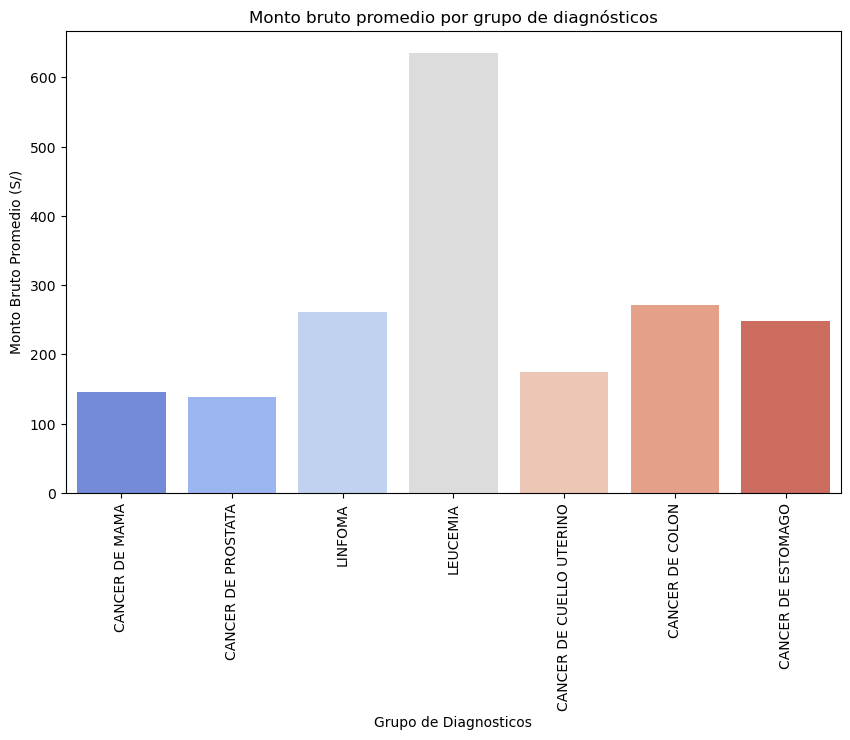

In [17]:


plt.figure(figsize=(10, 6))
sns.barplot(x='GRUPO_DIAGNOSTICOS', y='MONTO_BRUTO', data=df, estimator=np.mean, ci=None, palette='coolwarm')
plt.title("Monto bruto promedio por grupo de diagnósticos")
plt.xlabel("Grupo de Diagnosticos")
plt.ylabel("Monto Bruto Promedio (S/)")
plt.xticks(rotation=90)
plt.show()

In [18]:
#Transformación las columnas de fecha a tipo datetime
df['FECHA_INTERNAMIENTO'] = pd.to_datetime(df['FECHA_INTERNAMIENTO'], errors='coerce')
df['FECHA_ALTA'] = pd.to_datetime(df['FECHA_ALTA'], errors='coerce')
df['FECHA_ATENCION'] = pd.to_datetime(df['FECHA_ATENCION'], errors='coerce')
df.dtypes

RENAES                          int64
REGION                         object
DEPARTAMENTO                   object
PROVINCIA                      object
DISTRITO                       object
DIAGNOSTICOS                   object
GRUPO_DIAGNOSTICOS             object
SEXO                           object
EDAD                          float64
TIPO_SEGURO                    object
SERVICIO                       object
FECHA_ATENCION         datetime64[ns]
FECHA_INTERNAMIENTO    datetime64[ns]
FECHA_ALTA             datetime64[ns]
MONTO_BRUTO                   float64
dtype: object

In [19]:
df['DIFERENCIA_ALTA_INTERNAMIENTO'] = df['FECHA_ALTA'] - df['FECHA_INTERNAMIENTO']
print(df['DIFERENCIA_ALTA_INTERNAMIENTO'].dt.days)
df

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
           ..
1048570   NaN
1048571   NaN
1048572   NaN
1048573   NaN
1048574   NaN
Name: DIFERENCIA_ALTA_INTERNAMIENTO, Length: 1048575, dtype: float64


,RENAES,REGION,DEPARTAMENTO,PROVINCIA,DISTRITO,DIAGNOSTICOS,GRUPO_DIAGNOSTICOS,SEXO,EDAD,TIPO_SEGURO,SERVICIO,FECHA_ATENCION,FECHA_INTERNAMIENTO,FECHA_ALTA,MONTO_BRUTO,DIFERENCIA_ALTA_INTERNAMIENTO
0,7633,LIMA,LIMA,LIMA,SAN MARTIN DE PORRES,TUMOR MALIGNO DEL CUADRANTE SUPERIOR EXTERNO D...,CANCER DE MAMA,Femenino,50.0,SIS PARA TODOS,Apoyo al Tratamiento,2024-09-25 07:30:00,NaT,NaT,180.24,NaT
1,7633,LIMA,LIMA,LIMA,SAN MARTIN DE PORRES,TUMOR MALIGNO DEL CUADRANTE INFERIOR INTERNO D...,CANCER DE MAMA,Femenino,50.0,SIS PARA TODOS,Consulta externa,2024-10-23 07:52:00,NaT,NaT,23.57,NaT
2,7633,LIMA,LIMA,LIMA,SAN MARTIN DE PORRES,"TUMOR MALIGNO DE LA MAMA, PARTE NO ESPECIFICADA",CANCER DE MAMA,Femenino,50.0,SIS PARA TODOS,Apoyo al diagnóstico,2024-10-26 09:45:00,NaT,NaT,17.04,NaT
3,7633,LIMA,LIMA,LIMA,SAN MARTIN DE PORRES,"TUMOR MALIGNO DE LA MAMA, PARTE NO ESPECIFICADA",CANCER DE MAMA,Femenino,50.0,SIS PARA TODOS,Apoyo al diagnóstico,2024-11-18 10:02:00,NaT,NaT,42.19,NaT
4,6210,LIMA,LIMA,LIMA,SURQUILLO,"TUMOR MALIGNO DE LA MAMA, PARTE NO ESPECIFICADA",CANCER DE MAMA,Femenino,50.0,SIS GRATUITO,Consulta externa,2024-01-22 07:36:00,NaT,NaT,10.69,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,6210,LIMA,LIMA,LIMA,SURQUILLO,"TUMOR MALIGNO DE LA MAMA, PARTE NO ESPECIFICADA",CANCER DE MAMA,Femenino,55.0,SIS GRATUITO,Consulta externa,2023-06-23 09:41:00,NaT,NaT,24.47,NaT
1048571,6210,LIMA,LIMA,LIMA,SURQUILLO,"TUMOR MALIGNO DE LA MAMA, PARTE NO ESPECIFICADA",CANCER DE MAMA,Femenino,55.0,SIS GRATUITO,Telemonitoreo con prescripción y entrega de Me...,2023-06-22 07:19:00,NaT,NaT,431.20,NaT
1048572,6210,LIMA,LIMA,LIMA,SURQUILLO,"TUMOR MALIGNO DE LA MAMA, PARTE NO ESPECIFICADA",CANCER DE MAMA,Femenino,55.0,SIS GRATUITO,Consulta externa,2023-07-19 08:07:00,NaT,NaT,69.66,NaT
1048573,6210,LIMA,LIMA,LIMA,SURQUILLO,"TUMOR MALIGNO DE LA MAMA, PARTE NO ESPECIFICADA",CANCER DE MAMA,Femenino,55.0,SIS GRATUITO,Consulta externa,2023-08-12 07:54:00,NaT,NaT,155.05,NaT


In [29]:
#Determinar en tiempo entre el internamiento y el alta
diferencia_sin_nulls = df['DIFERENCIA_ALTA_INTERNAMIENTO'].dropna()
print(f"El promedio de dias de internamiento es {diferencia_sin_nulls.dt.days.mean():.2f} dias ")
print(f"La mediana de dias de internamiento es {diferencia_sin_nulls.dt.days.median():.2f} dias ")
print(f"El maximo tiempo de internamiento es {diferencia_sin_nulls.dt.days.max():.2f} dias ")
print(f"El minimo tiempo de internamiento es {diferencia_sin_nulls.dt.days.min():.2f} dias ")


El promedio de dias de internamiento es 9.64 dias 
La mediana de dias de internamiento es 5.00 dias 
El maximo tiempo de internamiento es 1464.00 dias 
El minimo tiempo de internamiento es 0.00 dias 


In [31]:
#La persona que mas dias estuvo internada
df['DIFERENCIA_DIAS'] = df['DIFERENCIA_ALTA_INTERNAMIENTO'].dt.days
tiempo_alto = df[df['DIFERENCIA_DIAS'] == df['DIFERENCIA_DIAS'].max()]
tiempo_alto

,RENAES,REGION,DEPARTAMENTO,PROVINCIA,DISTRITO,DIAGNOSTICOS,GRUPO_DIAGNOSTICOS,SEXO,EDAD,TIPO_SEGURO,SERVICIO,FECHA_ATENCION,FECHA_INTERNAMIENTO,FECHA_ALTA,MONTO_BRUTO,DIFERENCIA_ALTA_INTERNAMIENTO,DIFERENCIA_DIAS
44355,1232,AREQUIPA,AREQUIPA,AREQUIPA,AREQUIPA,"TUMOR MALIGNO DEL CUELLO DEL UTERO, SIN OTRA E...",CANCER DE CUELLO UTERINO,Femenino,80.0,SIS GRATUITO,Internamiento en EESS sin intervención quirúrgica,2024-11-29 06:00:00,2020-11-26,2024-11-29,195.664,1464 days,1464.0


In [22]:
#Determinar la cantidad de pacientes que se atendieron y luego se internaron, en comparación con los que no
diferencia_sin_nulls = df.dropna(subset=['DIFERENCIA_ALTA_INTERNAMIENTO'])
pacientes_atentidos_e_internados = len(diferencia_sin_nulls)
pacientes_atentidos_totales = len(df)
print(f"La cantidad de pacientes que se atendieron e internaron es: {pacientes_atentidos_e_internados}")
print(f"La cantidad total de pacientes atendidos es: {pacientes_atentidos_totales}")
print(f"El ratio de pacientes que se internaron despues de ser atendidos es: {pacientes_atentidos_e_internados/pacientes_atentidos_totales:.2%}")

La cantidad de pacientes que se atendieron e internaron es: 23850
La cantidad total de pacientes atendidos es: 1048575
El ratio de pacientes que se internaron despues de ser atendidos es: 2.27%


GRUPO_DIAGNOSTICOS
LEUCEMIA                    19
CANCER DE COLON             10
LINFOMA                     10
CANCER DE ESTOMAGO           8
CANCER DE CUELLO UTERINO     7
CANCER DE PROSTATA           7
CANCER DE MAMA               4
Name: DIFERENCIA_ALTA_INTERNAMIENTO, dtype: int64


C:\Users\Eduardo\AppData\Local\Temp\ipykernel_12156\2853122417.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=grupo_diagnosticos_tiempo.sort_values(ascending=False).values, y=grupo_diagnosticos_tiempo.sort_values(ascending=False).index, palette='viridis')


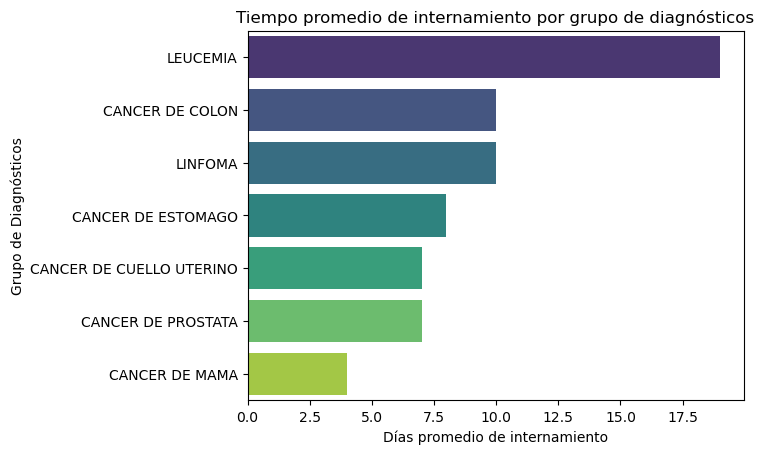

In [23]:
#Encontrar el grupo de diagnósticos con mayor tiempo promedio de internamiento
grupo_diagnosticos_tiempo = diferencia_sin_nulls.groupby('GRUPO_DIAGNOSTICOS')['DIFERENCIA_ALTA_INTERNAMIENTO'].mean().dt.days
print(grupo_diagnosticos_tiempo.sort_values(ascending=False))
sns.barplot(x=grupo_diagnosticos_tiempo.sort_values(ascending=False).values, y=grupo_diagnosticos_tiempo.sort_values(ascending=False).index, palette='viridis')
plt.title("Tiempo promedio de internamiento por grupo de diagnósticos")
plt.xlabel("Días promedio de internamiento")
plt.ylabel("Grupo de Diagnósticos")
plt.show()

In [ ]:
#Pasamos el archivo limpio a csv para una reporteria en power bi
df.to_csv('reporte_analisis_oncologico.csv', index=False)

# 📌 Conclusiones
- La mayor concentración de pacientes oncológicos atendidos se registra en Lima. Esto no necesariamente refleja una mayor incidencia de casos en esa región, sino la centralización de la oferta hospitalaria especializada en la capital, lo que evidencia la desigual distribución de servicios de salud en el Perú.
- El grupo diagnóstico con mayor número de registros corresponde al cáncer de mama, siendo el diagnóstico más frecuente el de “tumor maligno de mama, parte no especificada”.
- El 72.3% de los pacientes atendidos fueron mujeres, frente al 27.7% de hombres, lo que confirma la predominancia femenina en los registros oncológicos.
- La distribución etaria más común se concentra entre los 50 y 70 años, rango que coincide con la edad de mayor riesgo para varios tipos de cáncer.
- El tratamiento con mayor costo promedio corresponde a la leucemia, lo que refleja la complejidad y prolongación de los protocolos terapéuticos asociados a esta enfermedad.
- El promedio de días de hospitalización fue de 9 días, aunque se registró un caso extremo de 1464 días, lo que evidencia la heterogeneidad en la duración de los internamientos.
- El 2.27% de los pacientes (23,850 personas) requirió hospitalización posterior a la consulta, lo que muestra la magnitud de la demanda de atención especializada.
- Los diagnósticos con mayor tiempo promedio de hospitalización fueron la leucemia, seguida por el cáncer de colon, lo que refleja la intensidad clínica y el impacto de estas patologías en la capacidad hospitalaria.
- Para la integración en Power BI, se generaron dos columnas adicionales que calcularon la diferencia de días entre la fecha de internamiento y la de alta, lo que permitió medir con mayor precisión la duración de las hospitalizaciones. Asimismo, se eliminaron columnas irrelevantes para optimizar el análisis.
- Se identificó una gran cantidad de valores nulos en la base de datos. Sin embargo, no se realizaron correcciones por dos razones: (1) los nulos representaban a pacientes que fueron atendidos pero no hospitalizados, y (2) el estudio no contempla la construcción de modelos predictivos, por lo que no era necesario imputar o modificar dichos registros


# ⚠️ Limitaciones
- El análisis se basó exclusivamente en la fuente de datos abiertos del Perú, lo que restringe la posibilidad de contrastar con otras bases de información.
- El periodo de estudio abarca desde diciembre de 2022 hasta diciembre de 2025, limitando la comparación con tendencias históricas más amplias.
- La información corresponde únicamente a pacientes que utilizaron los seguros del SIS, por lo que no incluye a quienes accedieron a servicios privados u otros regímenes de aseguramiento.


# 💡 Recomendaciones

- Descentralización de servicios oncológicos: promover la creación y fortalecimiento de centros especializados fuera de Lima para reducir la concentración de pacientes en la capital.
- Ampliar la cobertura de datos: integrar información de otros sistemas de salud (privado, EsSalud, Fuerzas Armadas, etc.) para obtener una visión más completa de la situación oncológica nacional.
- Fortalecer la prevención y detección temprana: implementar campañas focalizadas en grupos de mayor riesgo (mujeres de 50 a 70 años, por ejemplo).
- Optimizar recursos hospitalarios: diseñar estrategias para reducir los tiempos de hospitalización prolongada, especialmente en leucemia y cáncer de colon.
- Investigación continua: fomentar estudios comparativos que analicen la evolución de costos, tiempos de internamiento y distribución geográfica en periodos más largos.

